In [53]:

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from sklearn.model_selection import train_test_split

#Model
from sklearn.linear_model import LogisticRegression

# Metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('Heart_Health.csv')

In [3]:
df.head()

,ID,Name,Age,Height(cm),Weight(kg),Systolic,Diastolic,Cholesterol(mg/dL),Glucose(mg/dL),Exercise(hours/week),Heart Attack,gender,smoker
0,1,John Doe,45,175,80,120,80,200,90,3,0,0,0
1,2,Jane Smith,35,160,65,110,70,180,80,2,0,1,0
2,3,Michael Johnson,55,180,85,130,85,220,95,4,1,0,1
3,4,Sarah Brown,40,165,70,115,75,190,85,3,0,1,0
4,5,David Lee,50,170,75,125,80,210,92,2,1,0,1


In [4]:
df.columns

Index(['ID', 'Name', 'Age', 'Height(cm)', 'Weight(kg)', 'Systolic',
       'Diastolic', 'Cholesterol(mg/dL)', 'Glucose(mg/dL)',
       'Exercise(hours/week)', 'Heart Attack', 'gender', 'smoker'],
      dtype='object')

In [5]:
df.shape

(724, 13)

In [6]:
df.describe()

,ID,Age,Height(cm),Weight(kg),Systolic,Diastolic,Cholesterol(mg/dL),Glucose(mg/dL),Exercise(hours/week),Heart Attack,gender,smoker
count,724.000000,724.000000,724.000000,724.000000,724.000000,724.000000,724.000000,724.000000,724.000000,724.000000,724.000000,724.000000
mean,361.712707,44.842541,171.161602,75.610497,121.662983,77.541436,206.022099,92.179558,2.770718,0.599448,0.500000,0.480663
std,207.901609,8.162429,6.242018,6.368595,4.000306,3.095474,11.224704,4.662712,0.934907,0.490349,0.500346,0.499971
min,1.000000,30.000000,155.000000,60.000000,105.000000,65.000000,170.000000,75.000000,1.000000,0.000000,0.000000,0.000000
25%,181.750000,38.000000,166.000000,71.000000,119.000000,75.000000,195.000000,88.000000,2.000000,0.000000,0.000000,0.000000
50%,362.500000,44.000000,170.000000,75.000000,122.000000,78.000000,210.000000,92.000000,3.000000,1.000000,0.500000,0.000000
75%,543.250000,53.000000,177.000000,81.000000,125.000000,80.000000,215.000000,96.000000,4.000000,1.000000,1.000000,1.000000
max,714.000000,60.000000,183.000000,89.000000,135.000000,85.000000,230.000000,100.000000,4.000000,1.000000,1.000000,1.000000


## Checking For Null values 

In [7]:
df.isnull().sum()

ID                      0
Name                    0
Age                     0
Height(cm)              0
Weight(kg)              0
Systolic                0
Diastolic               0
Cholesterol(mg/dL)      0
Glucose(mg/dL)          0
Exercise(hours/week)    0
Heart Attack            0
gender                  0
smoker                  0
dtype: int64

## Checking for Duplicate Values

In [8]:
df.duplicated().sum()

10

In [9]:
df.loc[df.duplicated(keep = False)]

,ID,Name,Age,Height(cm),Weight(kg),Systolic,Diastolic,Cholesterol(mg/dL),Glucose(mg/dL),Exercise(hours/week),Heart Attack,gender,smoker
657,658,Mary Taylor,43,167,70,120,78,200,92,2,0,1,0
658,659,Christopher Smith,53,182,86,125,78,225,98,2,1,0,1
659,660,Jennifer Garcia,47,170,73,121,77,205,94,3,1,1,1
660,661,William Lee,44,178,82,124,80,210,97,4,1,0,1
661,662,Michelle Wilson,38,164,66,116,73,190,88,2,0,1,0
662,663,Matthew Hernandez,55,181,84,125,78,220,100,3,1,0,1
663,664,Amanda Thomas,42,169,72,120,75,200,90,2,0,1,0
664,665,James Garcia,50,177,81,121,78,210,95,4,1,0,1
665,666,Sarah Nguyen,40,166,68,118,76,195,88,3,0,1,0
666,667,Robert Rodriguez,57,182,86,125,78,225,98,2,1,0,0


In [10]:
df.columns

Index(['ID', 'Name', 'Age', 'Height(cm)', 'Weight(kg)', 'Systolic',
       'Diastolic', 'Cholesterol(mg/dL)', 'Glucose(mg/dL)',
       'Exercise(hours/week)', 'Heart Attack', 'gender', 'smoker'],
      dtype='object')

In [11]:
numerical_features=['Age', 'Height(cm)', 'Weight(kg)', 'Systolic',
       'Diastolic', 'Cholesterol(mg/dL)', 'Glucose(mg/dL)',
       'Exercise(hours/week)']

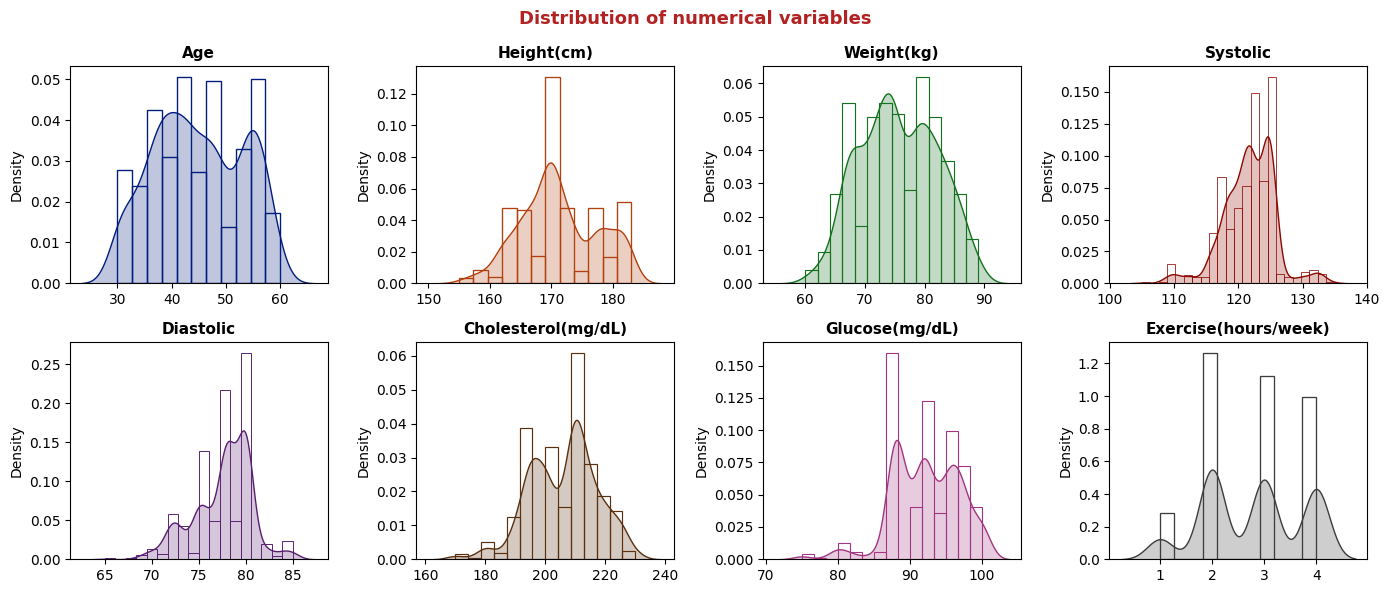

In [12]:
fig,ax = plt.subplots(nrows = 2, ncols = 4, figsize = (14, 6))
ax = ax.flat

colors = sns.color_palette(palette = 'dark', 
                           n_colors = len(numerical_features))

for i,feature in enumerate(numerical_features):
    sns.kdeplot(df, x = feature,color=colors[i], fill = True,  ax = ax[i])
    sns.histplot(df, x = feature, stat = 'density',color=colors[i], fill = False,  ax = ax[i])
    ax[i].set_xlabel('')
    ax[i].set_title(feature, fontsize = 11, fontweight = 'bold', color = 'black')
 
fig.suptitle("Distribution of numerical variables", fontsize = 13, fontweight = 'bold', color = 'firebrick')
#fig.delaxes(ax = ax[4])
fig.tight_layout()
fig.show()


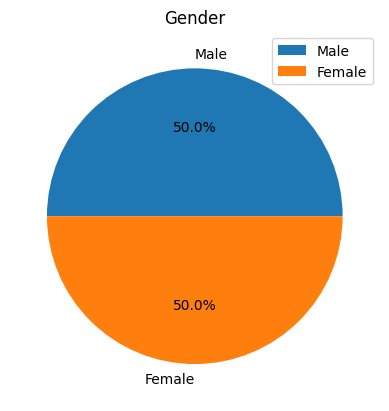

In [14]:
keys=['Male','Female']
plt.pie(df['gender'].value_counts(),labels=keys,autopct='%1.1f%%')
plt.title('Gender')
plt.legend()
plt.show()

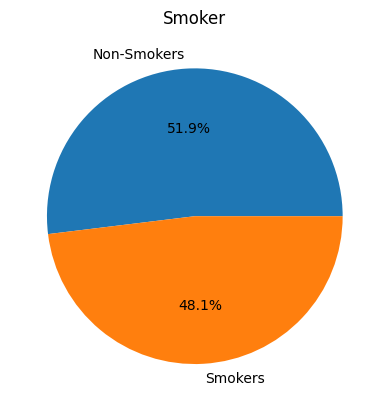

In [15]:
keys=['Non-Smokers','Smokers']
plt.pie(df['smoker'].value_counts(),labels=keys,autopct='%1.1f%%')
plt.title('Smoker')
#plt.legend()
#plt.legend('upper right')
plt.show()

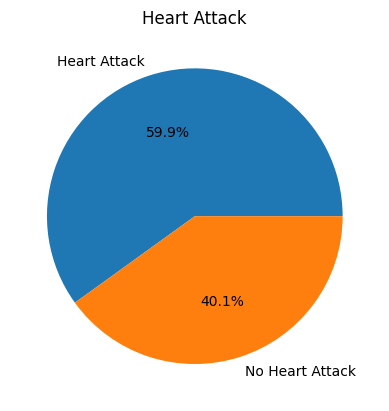

In [16]:
keys=['Heart Attack','No Heart Attack']
plt.pie(df['Heart Attack'].value_counts(),labels=keys,autopct='%1.1f%%')
plt.title('Heart Attack')
#plt.legend()
#plt.legend('upper right')
plt.show()

In [17]:
df1=df[['Age', 'Height(cm)', 'Weight(kg)', 'Systolic',
       'Diastolic', 'Cholesterol(mg/dL)', 'Glucose(mg/dL)',
       'Exercise(hours/week)', 'Heart Attack', 'gender', 'smoker']]

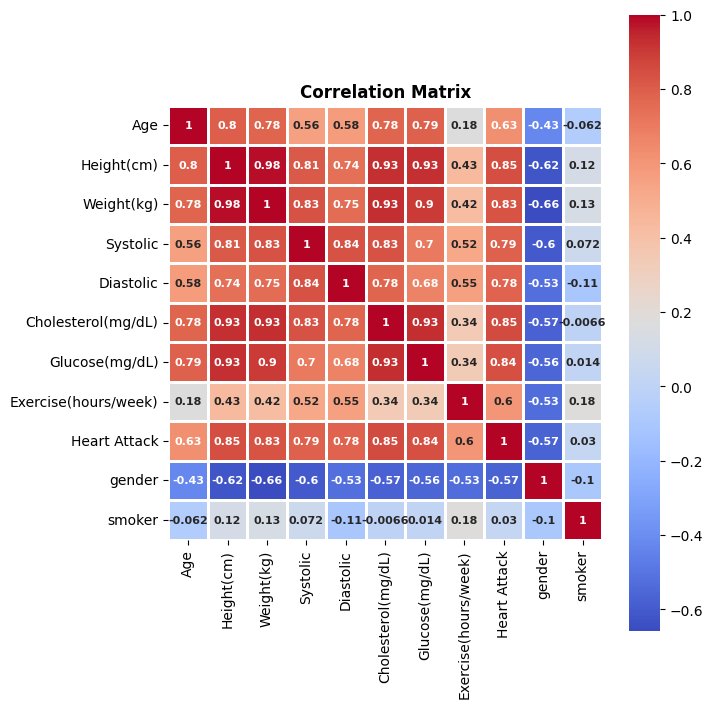

In [86]:
corr_matrix = df1.corr(method = 'spearman')
#mask = np.triu(np.ones_like(corr_matrix, dtype = bool))

fig,ax = plt.subplots(figsize = (7,8))
sns.heatmap(corr_matrix, 
            cmap = 'coolwarm', 
            annot = True, 
            annot_kws = {'fontsize':8, 
                         'fontweight':'bold'},
            linewidths = 1,
            square = True, 
            #mask = mask, 
            ax = ax)
ax.set_title("Correlation Matrix", fontsize = 12, fontweight = 'bold', color = 'black')
fig.show()

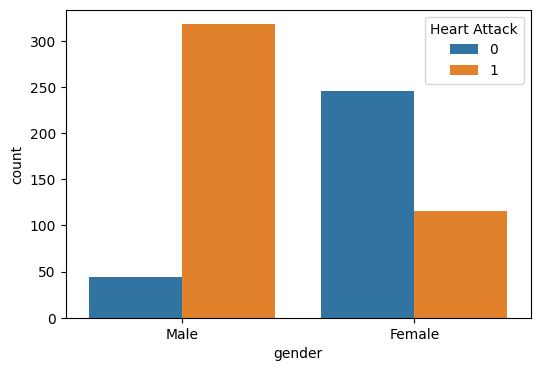

In [19]:
df['gender']=np.where((df['gender']==0),'Male','Female')

fig,ax = plt.subplots(figsize = (6,4))
df['Heart Attack'] = df['Heart Attack'].astype(str)
ax=sns.countplot(df,x='gender',hue='Heart Attack')
#plt.xticks(['Male','Female'])

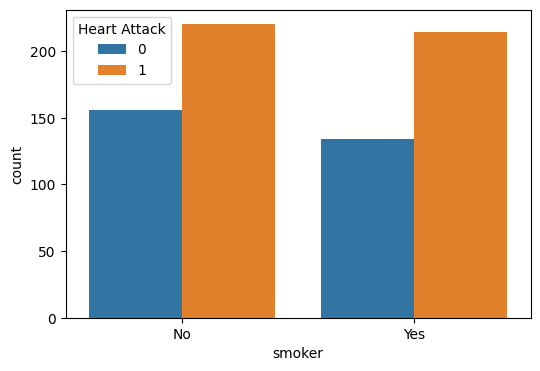

In [21]:
df['smoker']=np.where((df['smoker']==0),'No','Yes')

fig,ax = plt.subplots(figsize = (6,4))
ax=sns.countplot(df,x='smoker',hue='Heart Attack')


In [22]:
def BiPlot(idx:int):
    #plt.figure(figsize=(8,8))
    sns.kdeplot(df, x = numerical_features[idx], palette = 'bright', hue = 'Heart Attack',fill=True)
    plt.title(numerical_features[idx], fontweight = 'bold', color = 'black')
    plt.show()


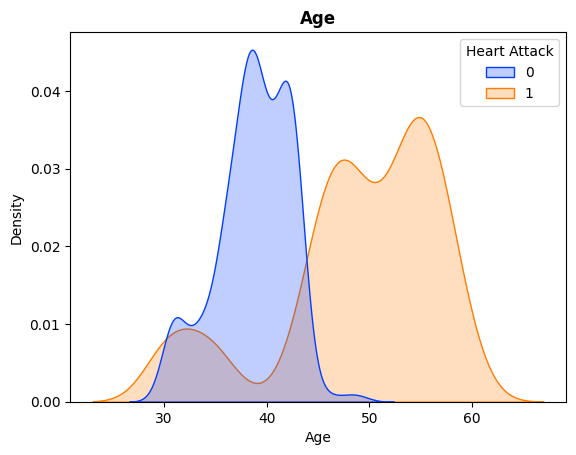

In [23]:
BiPlot(0)

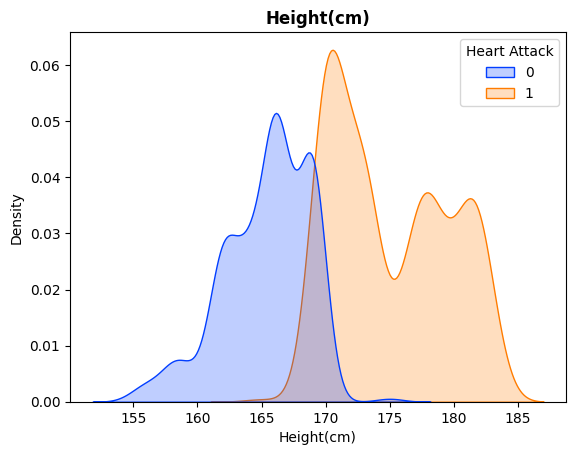

In [24]:
BiPlot(1)

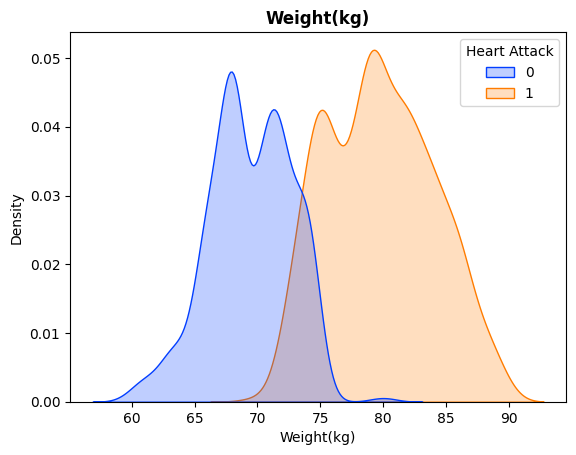

In [25]:
BiPlot(2)

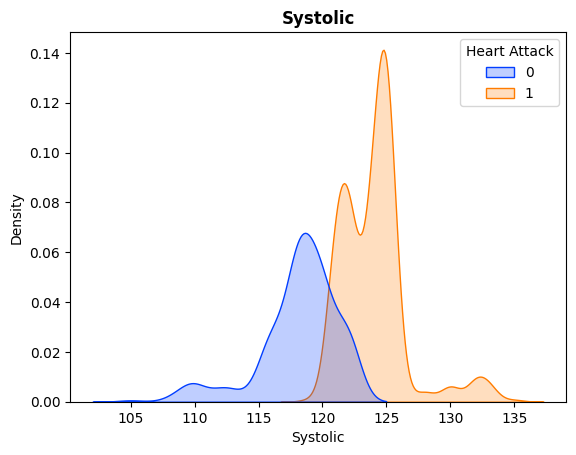

In [26]:
BiPlot(3)

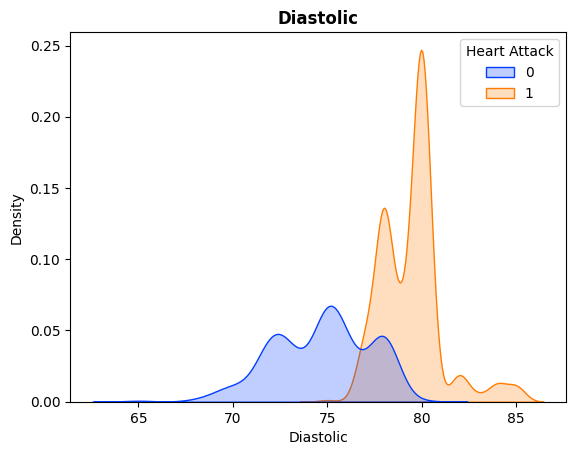

In [27]:
BiPlot(4)

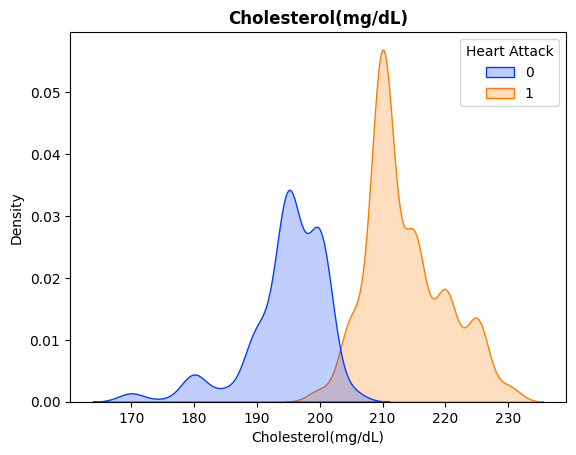

In [28]:
BiPlot(5)

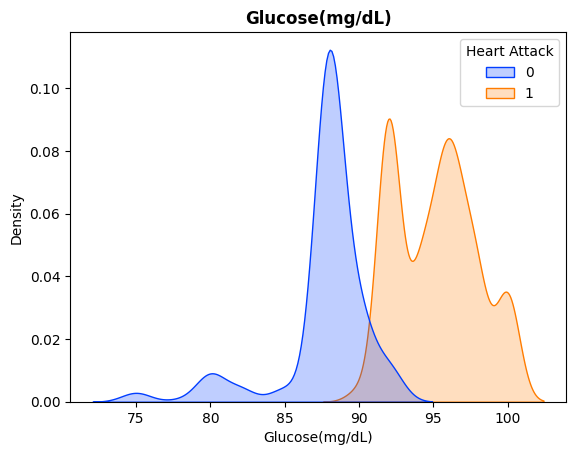

In [29]:
BiPlot(6)

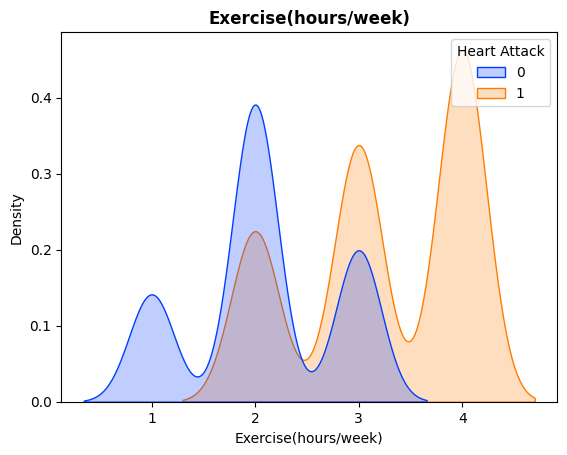

In [30]:
BiPlot(7)

In [31]:
X=df1.drop(['Heart Attack'],axis=1)
Y=df1['Heart Attack']

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3,)

# Logistic Regression 

In [32]:
clf1 = LogisticRegression(random_state = 40)
model=clf1.fit(x_train.to_numpy(),y_train.to_numpy())

In [33]:
y_pred_train=model.predict(x_train.to_numpy())
y_pred_test=model.predict(x_test.to_numpy())

# Checking Metrics

In [54]:
print("Accuracy:", accuracy_score(y_test, y_pred_test))
print("Precision:", precision_score(y_test, y_pred_test))
print("Recall:", recall_score(y_test, y_pred_test))
print("F1 Score:", f1_score(y_test, y_pred_test))

Accuracy: 0.9908256880733946
Precision: 0.9847328244274809
Recall: 1.0
F1 Score: 0.9923076923076923


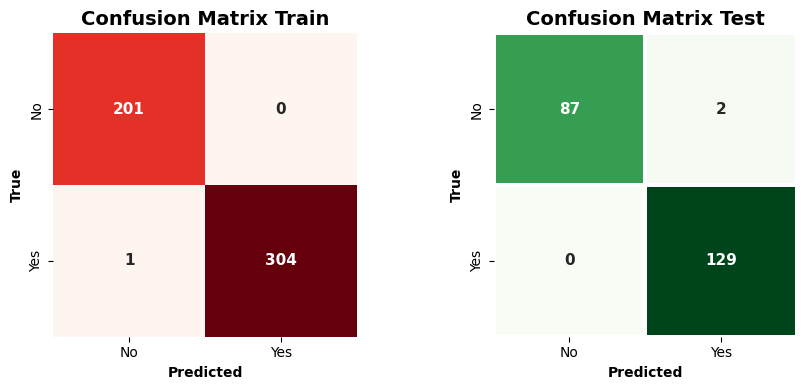

In [34]:
cf_mx_train = confusion_matrix(y_train, y_pred_train)
cf_mx_test = confusion_matrix(y_test, y_pred_test)

fig,axs = plt.subplots(nrows = 1, ncols = 2, figsize = (9,4))
axs = axs.flat

sns.heatmap(cf_mx_train, cmap = 'Reds', annot = True, annot_kws = {'fontsize':11, 'fontweight':'bold'},
             fmt = '', xticklabels = ['No', 'Yes'], yticklabels = ['No', 'Yes'], cbar = False, square = True, ax = axs[0])
sns.heatmap(cf_mx_test, cmap = 'Greens', annot = True, annot_kws = {'fontsize':11, 'fontweight':'bold'}, 
            linewidths = 1.5, fmt = '', xticklabels = ['No', 'Yes'], yticklabels = ['No', 'Yes'], cbar = False, square = True, ax = axs[1])

axs[0].set_xlabel('Predicted', fontweight = "bold")
axs[1].set_xlabel('Predicted', fontweight = "bold")
axs[0].set_ylabel('True', fontweight = "bold")
axs[1].set_ylabel('True', fontweight = "bold")
axs[0].set_title('Confusion Matrix Train', fontsize = 14, fontweight = "bold")
axs[1].set_title('Confusion Matrix Test', fontsize = 14, fontweight = "bold")

fig.tight_layout()
fig.show()

In [35]:
import statsmodels.api as sm

In [46]:
from sklearn.preprocessing import StandardScaler

In [47]:
scaler = StandardScaler()
x_standardized = scaler.fit_transform(x_train)

In [58]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_minmax = scaler.fit_transform(x_train)

x2=sm.add_constant(x_minmax)
models=sm.Logit(y_train.to_numpy(),x2)
models.fit(maxiter=1000)

         Current function value: inf
         Iterations: 1000


LinAlgError: Singular matrix

In [51]:
x2=sm.add_constant(x_standardized)
models=sm.Logit(y_train.to_numpy(),x2)
models.fit()

         Current function value: inf
         Iterations: 35


LinAlgError: Singular matrix